In [3]:
!pip install seaborn

In [4]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

## 1. Quantities: 
This type of graph shows the levels of variables. Also, these graphs show the variables according to categories or classifications.

In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Datasets transformed into Latin characters. The following commands should be used in STATA:

cd "....\documents"

unicode analyze enaho.dta

unicode encoding set "latin1" 

unicode translate enaho.dta


### The following database includes enaho modules (200, 300 and 500) for the period 2011 - 2019

In [6]:
enaho = pd.read_stata(r"../_data/enaho.dta")
enaho

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
0,2011,0061,077,11,010701,04,selva,"de 4,001 a 10,000 viviendas",2.011006e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,2.0,4.0,NaN,361.0,familiar,010000
1,2011,0110,112,11,010705,05,selva,Área de empadronamiento rural - aer compuesto,2.011011e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,9.0,400.0,familiar,010000
2,2011,0090,076,11,010205,03,selva,Área de empadronamiento rural - aer compuesto,2.011009e+14,nieto,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,36.0,484.0,familiar,010000
3,2011,0118,080,11,010401,03,selva,Área de empadronamiento rural - aer simple,2.011012e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,6.0,36.0,NaN,529.0,familiar,010000
4,2011,3408,066,11,010402,03,selva,Área de empadronamiento rural - aer compuesto,2.011341e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,0.0,400.0,familiar,010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160767,2019,009703,084,11,250302,05,selva,"401 a 4,000 viviendas",2.019010e+16,yerno/nuera,...,11.0,4.0,15.0,Universitaria incompleta,0.0,0.0,NaN,441.0,familiar,250000
160768,2019,009675,124,11,250107,03,selva,"de 20,001 a 100,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,0.0,484.0,familiar,250000
160769,2019,009703,084,11,250302,04,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,9.0,81.0,0.0,676.0,familiar,250000
160770,2019,009700,143,11,250301,03,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,NaN,400.0,familiar,250000


In [7]:
enaho['empresa']

0                     NaN
1            microempresa
2            microempresa
3                     NaN
4            gran empresa
               ...       
160767                NaN
160768       microempresa
160769    mediana empresa
160770                NaN
160771       microempresa
Name: empresa, Length: 160772, dtype: category
Categories (4, object): ['microempresa' < 'pequeña empresa' < 'mediana empresa' < 'gran empresa']

### Number of companies classification by number of workers hired
Microbusinesses < 10 workers ;
Small businesses (10-20 workers);
Medium businesses (21-100 workers);
Big Businesses (>100 workers)

Why do many examples use `fig, ax = plt.subplots()` in Matplotlib/pyplot/python ? 

https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

Text(0, 0.5, 'Número de Observaciones ')

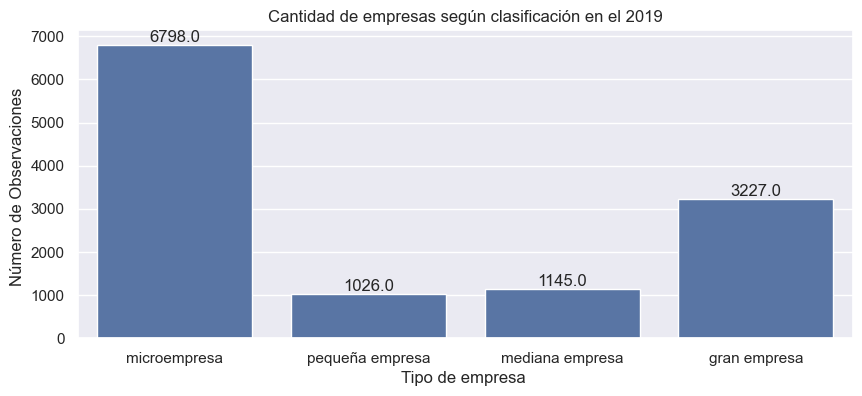

In [17]:
#Esto es para definir el estilo
sns.set( style="darkgrid" )
# sns.set( style="whitegrid" )
#figure size

#determino el largo y el ancho
fig, ax = plt.subplots( figsize=(10,4) )

x = sns.countplot( x="empresa", data=enaho[enaho['year'] == "2019" ] )

# Iterar sobre las barras
for p in ax.patches:
    # Obtener la posición y la altura de la barra
    height = p.get_height()
    # Colocar el texto sobre la barra
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{}'.format(height), ha='center', va='bottom')
    
plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Tipo de empresa ')
plt.ylabel('Número de Observaciones ')


###### Vertical Countplot and one color (red)

Text(0, 0.5, 'Tipo de empresa')

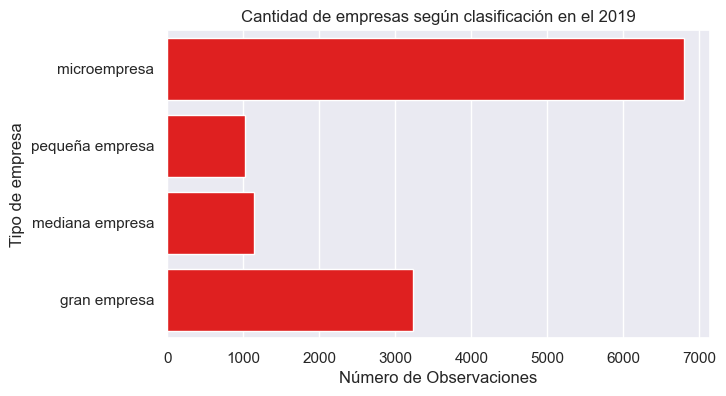

In [18]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(7,4))

x = sns.countplot(y = "empresa", data=enaho[enaho['year'] == "2019" ], color = 'red')

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Número de Observaciones')
plt.ylabel('Tipo de empresa')

### Evolutions of business in period 2017-2019



Text(0.01, 0.01, 'Fuente: Elboración propia - ENAHO (2011-2019)')

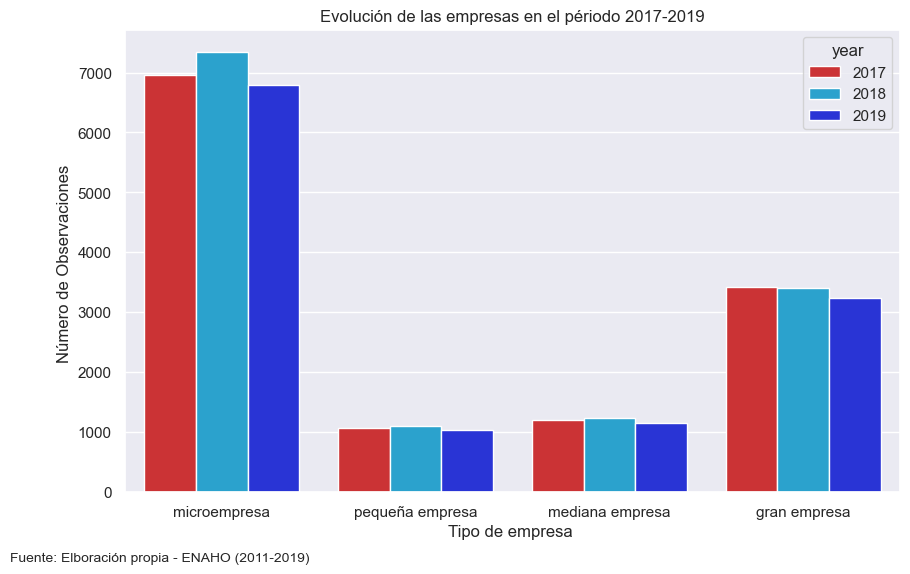

In [19]:
base2 = enaho[enaho['year'] > "2016" ]

fig, ax = plt.subplots(figsize=(10,6))

# hue: variable descomposition
#buscar color picker y definir colores con la paleta
ax = sns.countplot(x="empresa", hue="year", linewidth=1, data=base2,  palette=["#e41a1c", "#10afe8", "#0c1bf2"])

plt.title('Evolución de las empresas en el périodo 2017-2019')
plt.xlabel('Tipo de empresa ')
plt.ylabel('Número de Observaciones ')

txt="Fuente: Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.01, 0.01, txt, wrap=True, horizontalalignment='left', va="top", fontsize=10)

### Number of companies by strata (urbano o rural) and evolution by years

hue = split in groups but in the same graph <br>
col = create two new groups base in id group

In [20]:
base2.area

103666    Urbana
103667     Rural
103668    Urbana
103669    Urbana
103670    Urbana
           ...  
160767    Urbana
160768    Urbana
160769    Urbana
160770    Urbana
160771    Urbana
Name: area, Length: 57106, dtype: category
Categories (2, object): ['Rural' < 'Urbana']

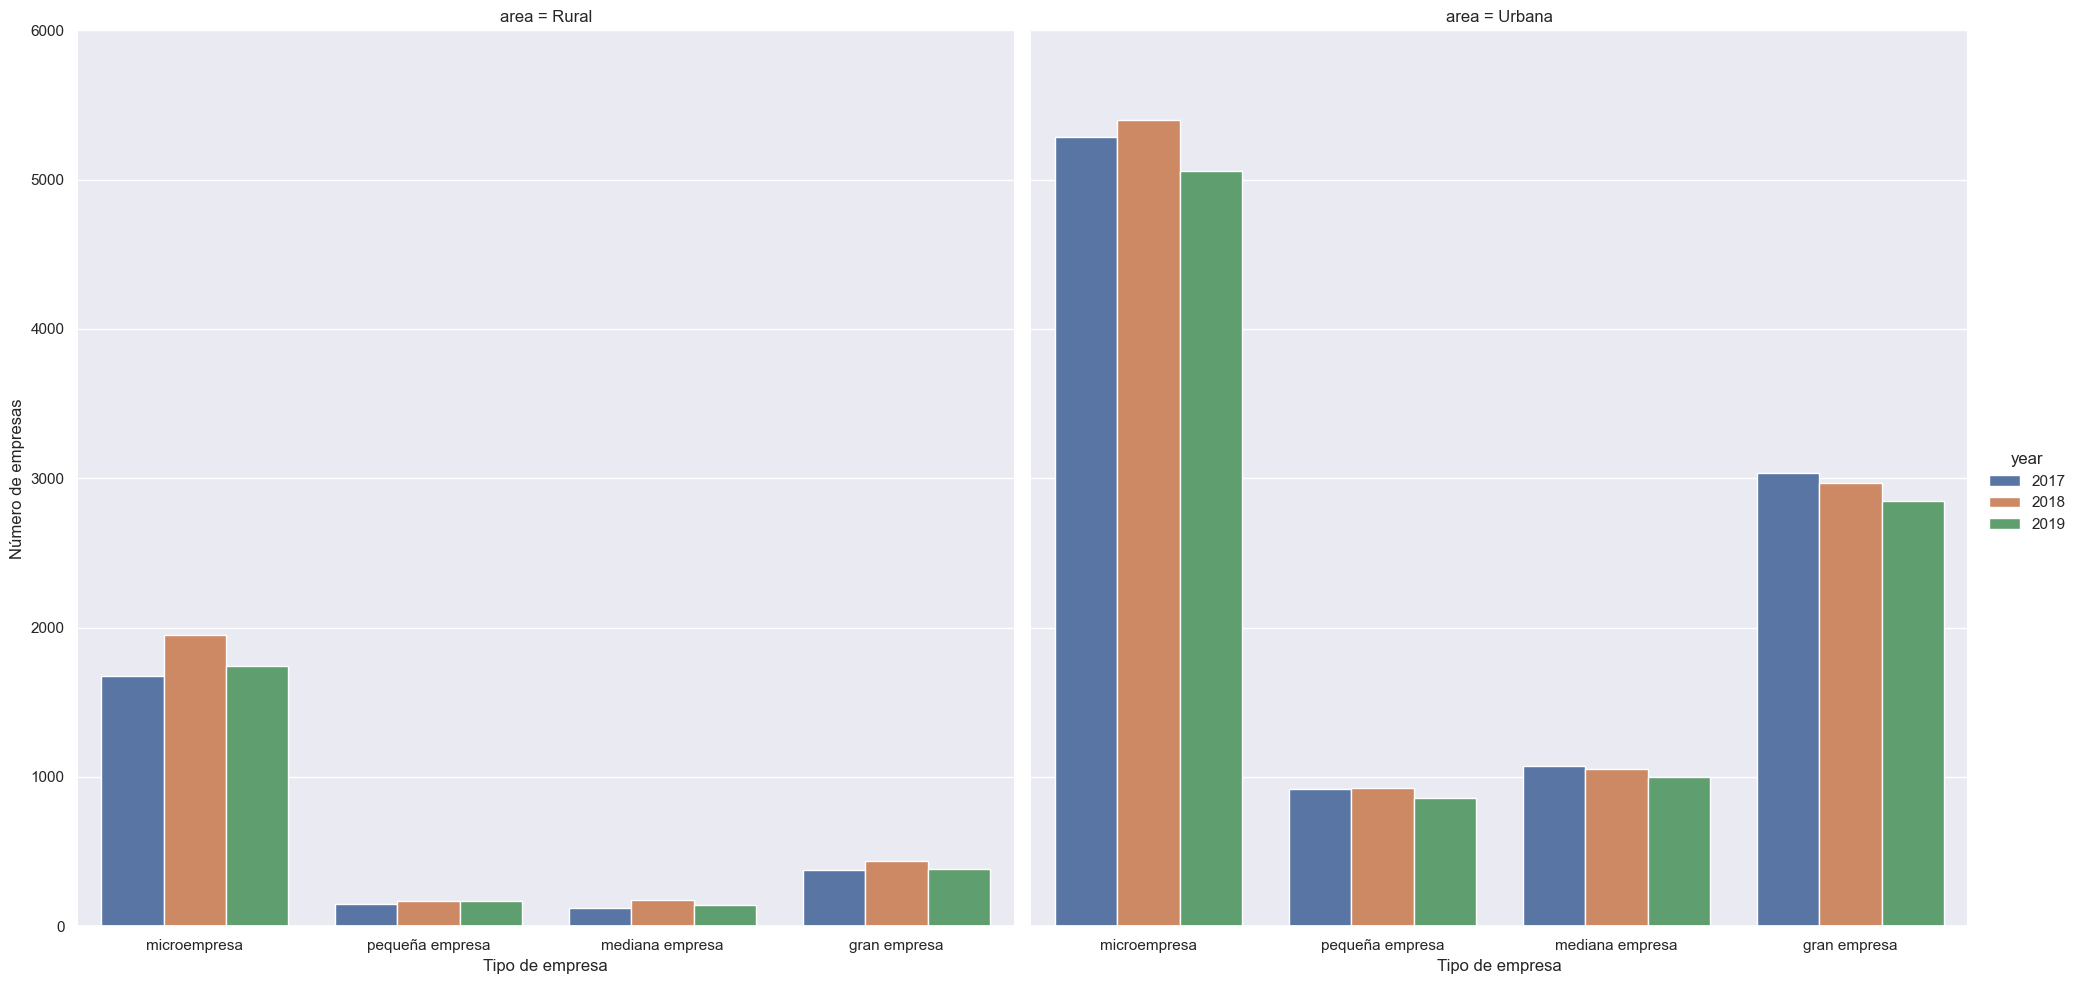

In [24]:
ag = sns.catplot(x="empresa", hue="year", col= "area" , data= base2, kind="count", height=10, aspect=1);

(ag.set_axis_labels("Tipo de empresa", "Número de empresas")
  .set(ylim=(0, 6000))
  .despine(left=True)) 

#### Number of businesses by strata - stacked bar plot

In [55]:
# enaho['conglome']

In [25]:
enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\577524465.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')


,empresa,area,num_firms
0,microempresa,Rural,1742
1,microempresa,Urbana,5056
2,pequeña empresa,Rural,169
3,pequeña empresa,Urbana,857
4,mediana empresa,Rural,145
5,mediana empresa,Urbana,1000
6,gran empresa,Rural,381
7,gran empresa,Urbana,2846


In [22]:
# count businesses by strata using groubpy (similar collapse - stata)
#base_2 = enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ], as_index = False )[['conglome'] ].count()
base_2 = enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')
base_2

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\1550687098.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base_2 = enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')


,empresa,area,num_firms
0,microempresa,Rural,1742
1,microempresa,Urbana,5056
2,pequeña empresa,Rural,169
3,pequeña empresa,Urbana,857
4,mediana empresa,Rural,145
5,mediana empresa,Urbana,1000
6,gran empresa,Rural,381
7,gran empresa,Urbana,2846


In [30]:
# stacked information
base_3 = base_2.pivot(index = 'empresa', columns = 'area', values = 'num_firms')
base_3

area,Rural,Urbana
empresa,,
microempresa,1742,5056
pequeña empresa,169,857
mediana empresa,145,1000
gran empresa,381,2846


In [31]:
base_3.columns

CategoricalIndex(['Rural', 'Urbana'], categories=['Rural', 'Urbana'], ordered=True, dtype='category', name='area')

In [32]:
base_3_2 = base_3.copy()

In [33]:
base_3_2 = base_3_2[["Urbana", "Rural"]]
base_3_2

area,Urbana,Rural
empresa,,
microempresa,5056,1742
pequeña empresa,857,169
mediana empresa,1000,145
gran empresa,2846,381


Text(0.5, 0, ' ')

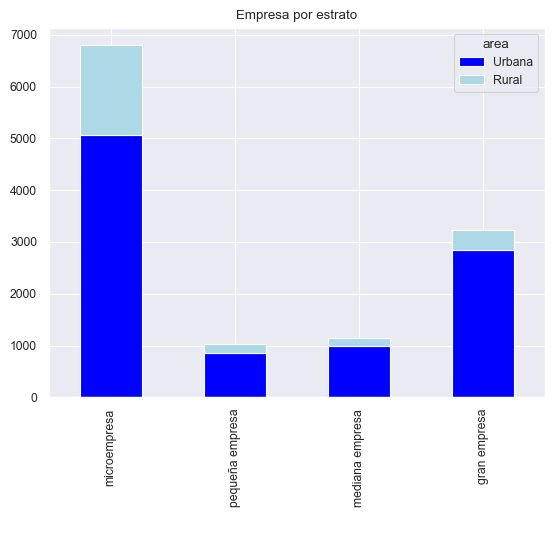

In [34]:
base_3_2.plot( kind='bar', stacked=True, title='Empresa por estrato', color = ['blue', 'lightblue'] )
plt.xlabel(' ')

Text(0.5, 0, ' ')

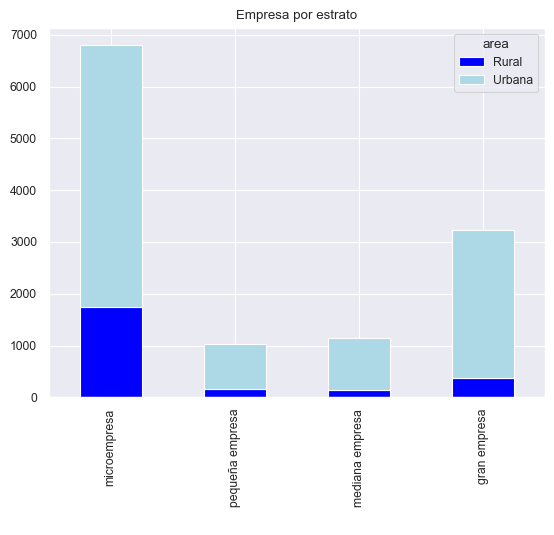

In [35]:
base_3.plot( kind='bar', stacked=True, title='Empresa por estrato', color = ['blue', 'lightblue'] )
plt.xlabel(' ')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'microempresa'),
  Text(1, 0, 'pequeña empresa'),
  Text(2, 0, 'mediana empresa'),
  Text(3, 0, 'gran empresa')])

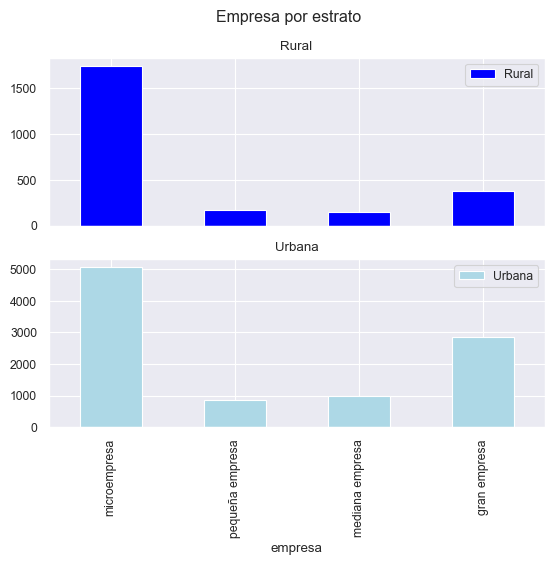

In [36]:
axes = base_3.plot( kind='bar', rot=0, subplots=True, color = ['blue', 'lightblue'], title='Empresa por estrato')
plt.xticks(rotation=90)

## 2. Proportions

Understandable plots to show categorical variables. Use this plots to explain participations from categories. 

### Pie 

##### First at all, collapse dataframe to count categories of a variable 

In [37]:
base = enaho.groupby([ 'empresa' ]).count()
base

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\407101649.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base = enaho.groupby([ 'empresa' ]).count()


,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
empresa,,,,,,,,,,,,,,,,,,,,,
microempresa,58002,58002,58002,58002,58002,58002,58002,58002,58002,58002,...,57991,58002,57991,57991,57565,57565,58001,58002,58002,58002
pequeña empresa,9306,9306,9306,9306,9306,9306,9306,9306,9306,9306,...,9301,9306,9301,9301,9202,9202,9303,9306,9306,9306
mediana empresa,10304,10304,10304,10304,10304,10304,10304,10304,10304,10304,...,10302,10304,10302,10302,10212,10212,10304,10304,10304,10304
gran empresa,29642,29642,29642,29642,29642,29642,29642,29642,29642,29642,...,29639,29642,29639,29639,29392,29392,29640,29642,29642,29642


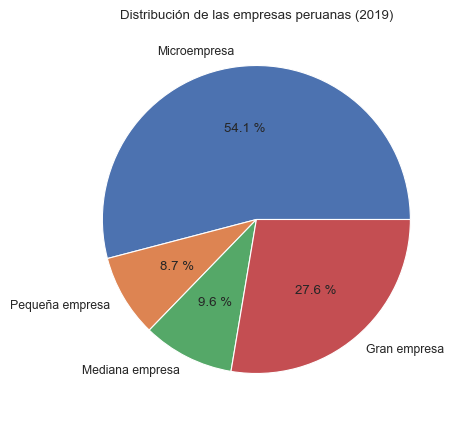

In [38]:
# Labels to correct categories names 

labels=['Microempresa','Pequeña empresa' , 'Mediana empresa', 'Gran empresa']

plt.figure(figsize=(5,5))

ax = plt.pie(base['conglome'], labels=labels, autopct='%.1f %%')
plt.title('Distribución de las empresas peruanas (2019)')
plt.show()

In [39]:
enaho.labor

0                                                       NaN
1                                   Ocupaciones elementales
2         Trabajo en actividades agrícolas, selvicultura...
3                                                       NaN
4                     Trabajadores de ventas y en servicios
                                ...                        
160767                                                  NaN
160768                              Ocupaciones elementales
160769                    Operadores de planta y maquinaria
160770                                                  NaN
160771                Trabajadores de ventas y en servicios
Name: labor, Length: 160772, dtype: category
Categories (9, object): ['Ocupaciones elementales' < 'Administradores' < 'Profesionales y fuerzas armadas' < 'Técnicos y similares' ... 'Trabajadores de ventas y en servicios' < 'Trabajo en actividades agrícolas, selvicultur... < 'Trabajo en artesanía y afines' < 'Operadores de planta y maquina

In [40]:
base = enaho.groupby('labor').size()
base

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\3519101727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base = enaho.groupby('labor').size()


labor
Ocupaciones elementales                                   25556
Administradores                                           11310
Profesionales y fuerzas armadas                            1958
Técnicos y similares                                      12414
Asistentes administrativos                                14423
Trabajadores de ventas y en servicios                     18691
Trabajo en actividades agrícolas, selvicultura y pesca     5224
Trabajo en artesanía y afines                              8648
Operadores de planta y maquinaria                         11794
dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\1542738400.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base = enaho.groupby('labor').size()


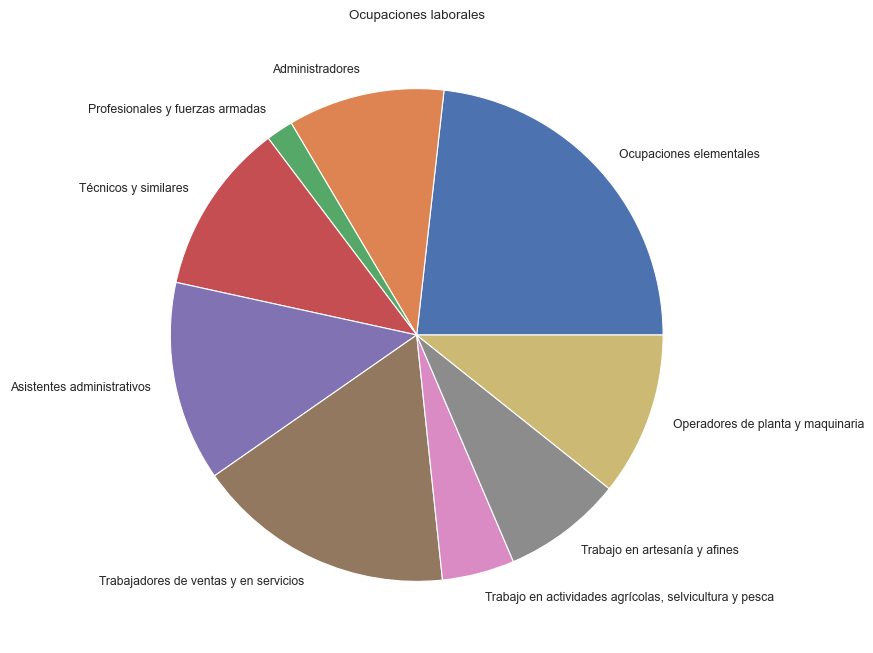

In [41]:
base = enaho.groupby('labor').size()
base.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Ocupaciones laborales")
plt.ylabel("")
plt.show()

## Donuts

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\2369940427.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base2 = enaho.groupby([ 'sector' ]).count()


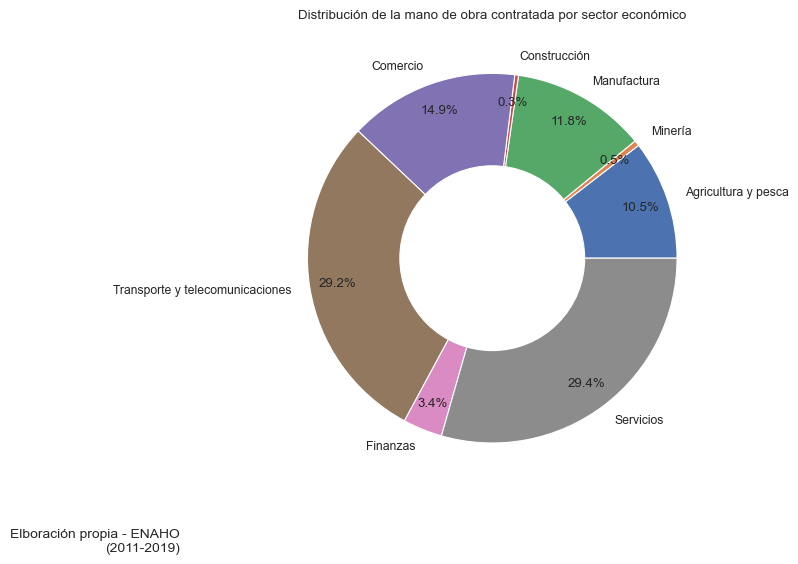

In [45]:
base2 = enaho.groupby([ 'sector' ]).count()

labels=['Agricultura y pesca','Minería','Manufactura','Construcción','Comercio','Transporte y telecomunicaciones', 'Finanzas', 'Servicios']
plt.figure(figsize=(10, 6))

ax = plt.pie(base2['conglome'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
  
# centroid size and color

center_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Distribución de la mano de obra contratada por sector económico')

# Adding notes

txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

plt.show()

## 3. Distributions

Distribution plots visually assess the distribution of sample data by comparing the empirical distribution of the data with the theoretical values expected from a specified distribution.

<Axes: >

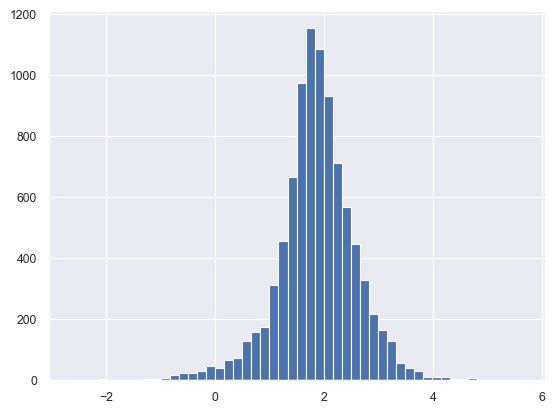

In [50]:
base4.l_salario.hist(bins=50)

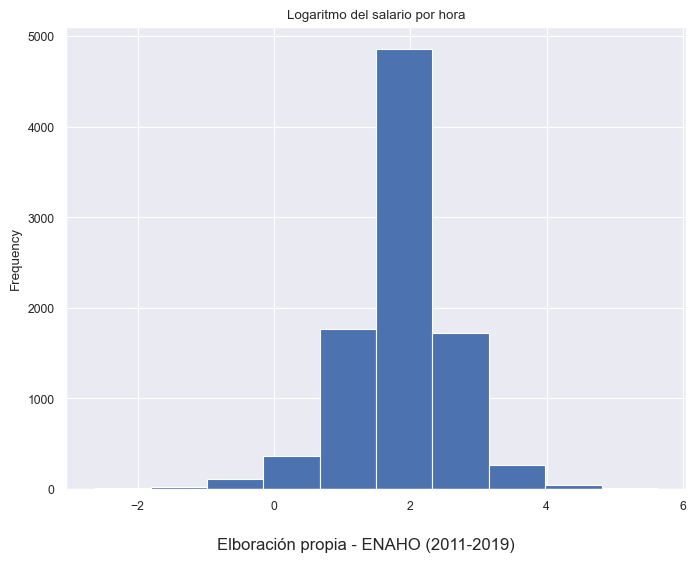

In [49]:
#filter database to 2019
base4 = enaho[enaho['year'] == "2019" ]

base4['l_salario'].plot(kind = 'hist', bins = 10, figsize = (8,6))
plt.title('Logaritmo del salario por hora')

txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### Reducing intervals 

Frequency distribution with a smaller interval (lower relative frequency). Therefore, the height of each bar accounts smaller amount.

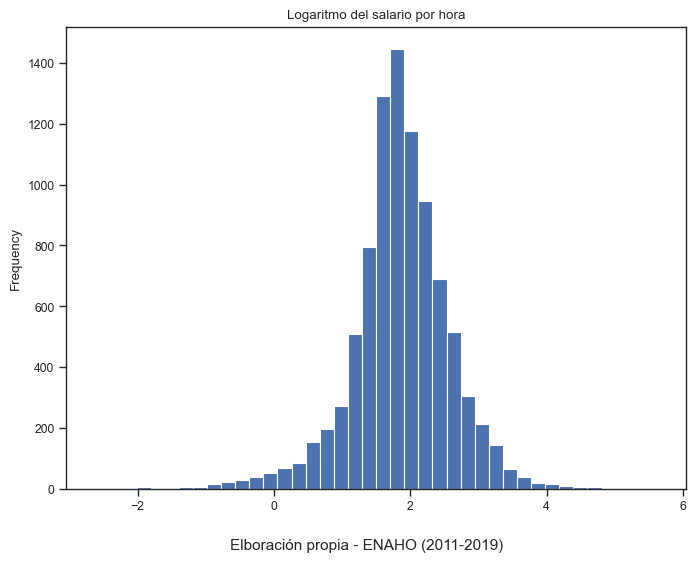

In [51]:
sns.set('paper')
sns.set_style("ticks")

base4['l_salario'].plot(kind = 'hist', bins = 40, figsize = (8,6))
plt.title('Logaritmo del salario por hora')

txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()

### Multiple histograms

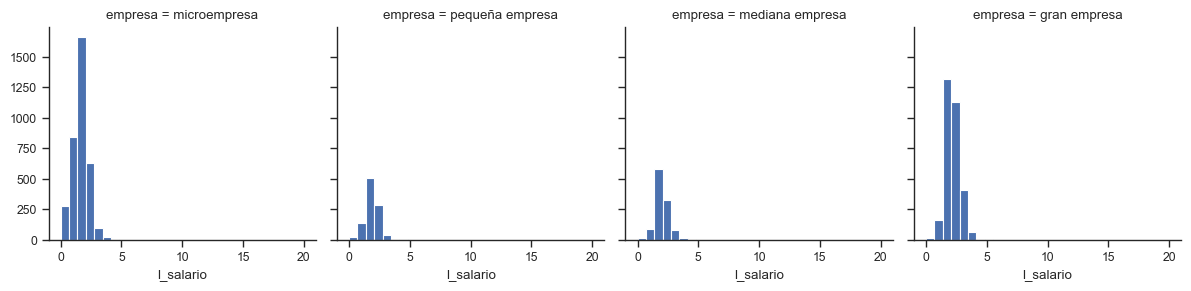

In [52]:
figure1 = sns.FacetGrid(base4, col="empresa", margin_titles=True)
figure1.map(plt.hist, 'l_salario', bins=np.linspace(0, 20, 30))

##### Real salary per hour density: 
the distribution does not resemble a standard normal. The information is concentrated in lower values and there are some observations of high values.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\223923443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base4['salario'], label = "Densidad", color = 'blue')


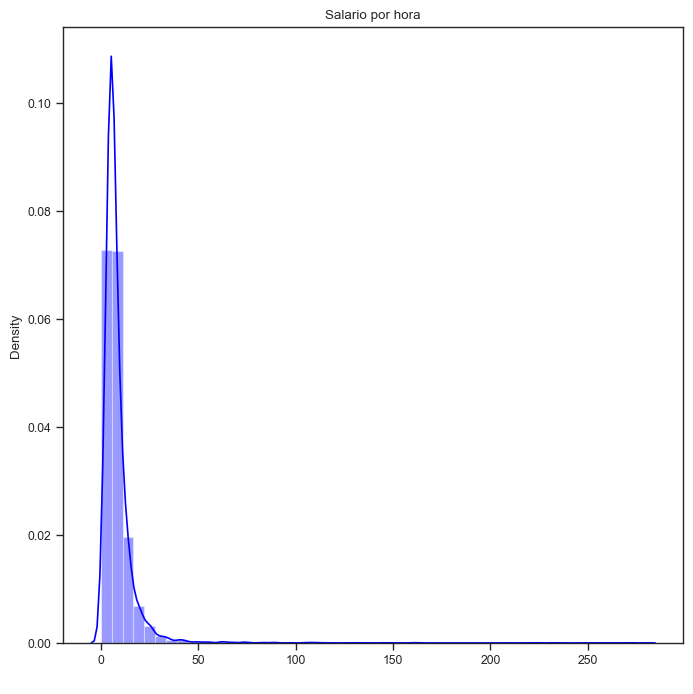

In [53]:
plt.figure(figsize=(8, 8))

sns.distplot(base4['salario'], label = "Densidad", color = 'blue')
plt.title('Salario por hora')
plt.xlabel(' ')
plt.show()

### Logarithm of real hourly wage

This allows correcting the asymmetry presented by the original data.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\989620771.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base4['l_salario'], label = "Densidad", color = 'black')


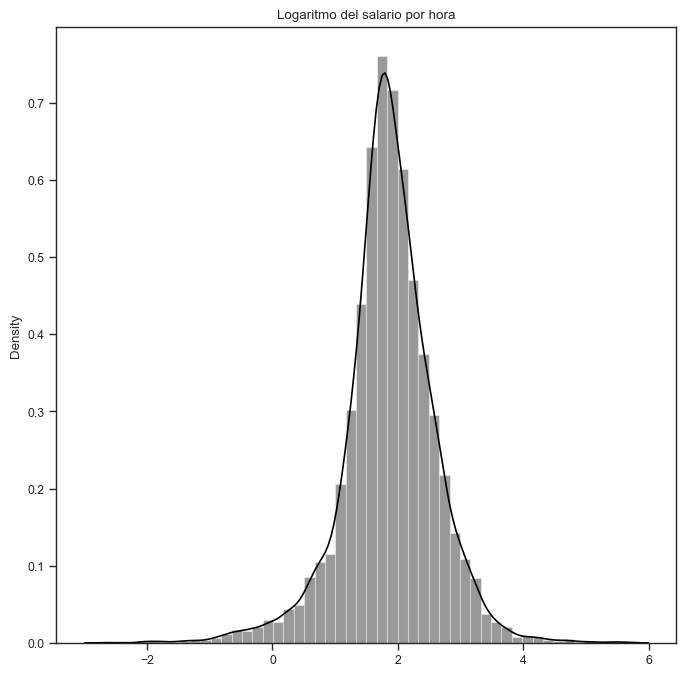

In [54]:
#Alternative figure size
plt.figure(figsize=(8, 8))

sns.distplot(base4['l_salario'], label = "Densidad", color = 'black')
plt.title('Logaritmo del salario por hora')
plt.xlabel(' ')
plt.show()

#### Real salaries for tres sectors (Construction, Mining and services)


In [55]:
base4.sector

142727    agricultura, selvicultura y pesca
142728                                  NaN
142729                                  NaN
142730    agricultura, selvicultura y pesca
142731                                  NaN
                        ...                
160767                                  NaN
160768     Comercio, hoteles y restaurantes
160769     Comercio, hoteles y restaurantes
160770                                  NaN
160771     Comercio, hoteles y restaurantes
Name: sector, Length: 18045, dtype: category
Categories (8, object): ['agricultura, selvicultura y pesca' < 'minería' < 'Manufactura y servicios públcios' < 'Construcción' < 'Comercio, hoteles y restaurantes' < 'Transporte, comunicaciones y alamacenamiento' < 'Finanzas, seguro y bienes raíces' < 'Servicios persnales, sociales y comunales']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\5583352.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.sector=='Construcción'], label='Construcción', shade=True, color="blue")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\5583352.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.sector=='Comercio, hoteles y restaurantes'], label='Comercio, hoteles y restaurantes', shade=True, color = "red")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\5583352.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.sector=='minería'], label='Minería ', 

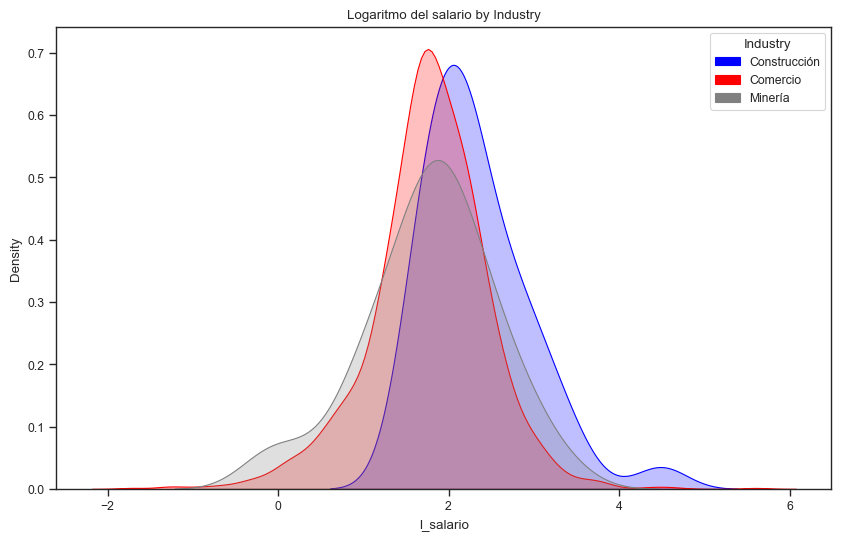

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))

#Adding densities 

sns.kdeplot(base4.l_salario[base4.sector=='Construcción'], label='Construcción', shade=True, color="blue")
sns.kdeplot(base4.l_salario[base4.sector=='Comercio, hoteles y restaurantes'], label='Comercio, hoteles y restaurantes', shade=True, color = "red")
sns.kdeplot(base4.l_salario[base4.sector=='minería'], label='Minería ', shade=True, color="gray")
plt.title('Logaritmo del salario by Industry')

# Define custom colors
color1 = 'blue'
color2 = 'red'
color3 = "gray"
# Create legend handles
handle1 = mpatches.Patch(color=color1, label='Construcción')
handle2 = mpatches.Patch(color=color2, label='Comercio')
handle3 = mpatches.Patch(color=color3, label='Minería')

# Manually adding a legend with custom colors
plt.legend(handles=[handle1, handle2, handle3], title='Industry')
# Construction sector shows certain stochastic dominance over mining and services

### Labor occupations and real salary per hour densities

A For loop is used to include in the same graph the density function of hourly wages for different occupations.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\307922577.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True, color = c)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\307922577.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True, color = c)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\307922577.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True, color = c)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\307922577.py:12: FutureWarning: 

`s

Text(0.5, 0, 'Logaritmo del salario por tipo de ocupación')

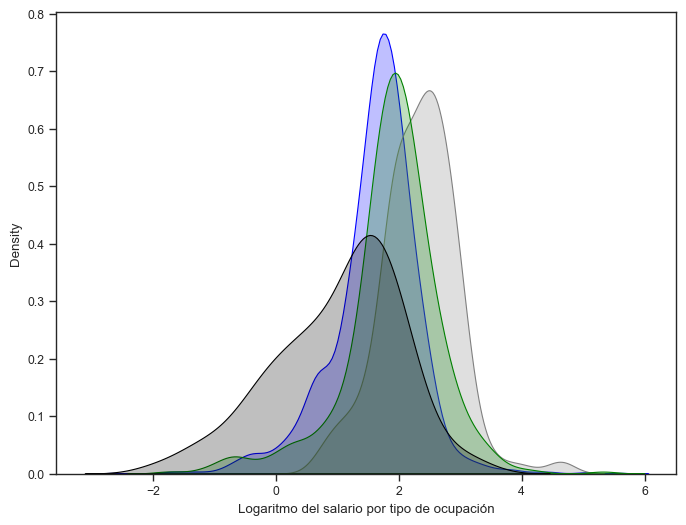

In [57]:
fig, ax = plt.subplots(figsize=(8,6))

sector = [ 'Ocupaciones elementales', 'Profesionales y fuerzas armadas', 'Operadores de planta y maquinaria',
          'Trabajo en actividades agrícolas, selvicultura y pesca']

nombre = [ 'Ocupaciones elementales', 'Profesionales', 'Planta y maquinaria','Actividades extractivas']

color = [ 'blue', 'gray', 'green','black']

    
for a, b, c in zip(sector, nombre, color):
        sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True, color = c)

plt.xlabel('Logaritmo del salario por tipo de ocupación')

# Two relevant findings: stochastic dominance of the salary of professionals and 
# concentration in lower levels of salary in the non-active primary sector.

### Box plot real salary and education 



C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\10334801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x="educ", y="l_salario", data=enaho[enaho['year'] == "2019" ] ,palette='pastel')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23036\10334801.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  (box.set_xticklabels(["Sec. completa", "No uni. incompleta", "No uni. completa", "Uni. incompleta", "Uni. completa", "Posgrado"]))\


[Text(0, 0, 'Sec. completa'),
 Text(1, 0, 'No uni. incompleta'),
 Text(2, 0, 'No uni. completa'),
 Text(3, 0, 'Uni. incompleta'),
 Text(4, 0, 'Uni. completa'),
 Text(5, 0, 'Posgrado')]

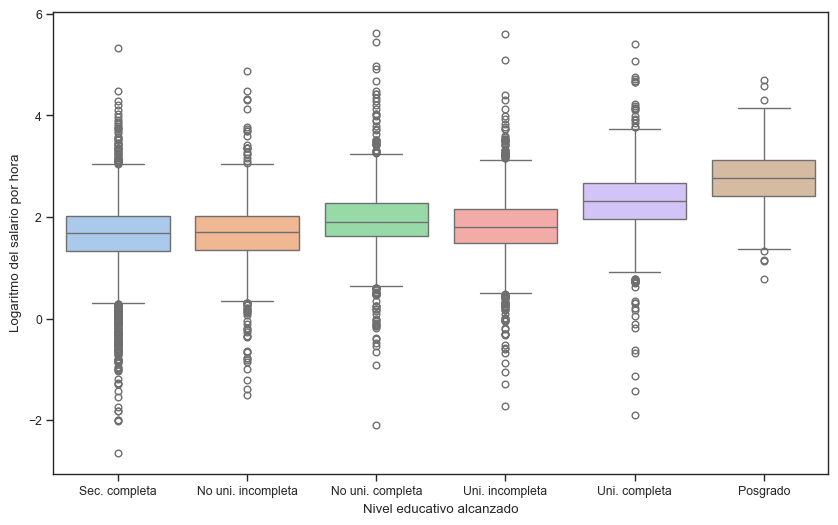

In [58]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="educ", y="l_salario", data=enaho[enaho['year'] == "2019" ] ,palette='pastel')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Logaritmo del salario por hora')
(box.set_xticklabels(["Sec. completa", "No uni. incompleta", "No uni. completa", "Uni. incompleta", "Uni. completa", "Posgrado"]))\

# The real wage quartiles are increasing with the educational level.
# Lower salary dispersion for the postgraduate level. pastel


## 4. Relationships

Charts used for both time series and cross-sectional data. These graphs allow to establish certain evidence of correlation or relationships between variables.

### Scatter plot 

First, a random sample is drawn from the original database. Subsequently, a dispersion graph is presented between the hourly wage (logarithm) and the non-labor monthly income (logarithm).

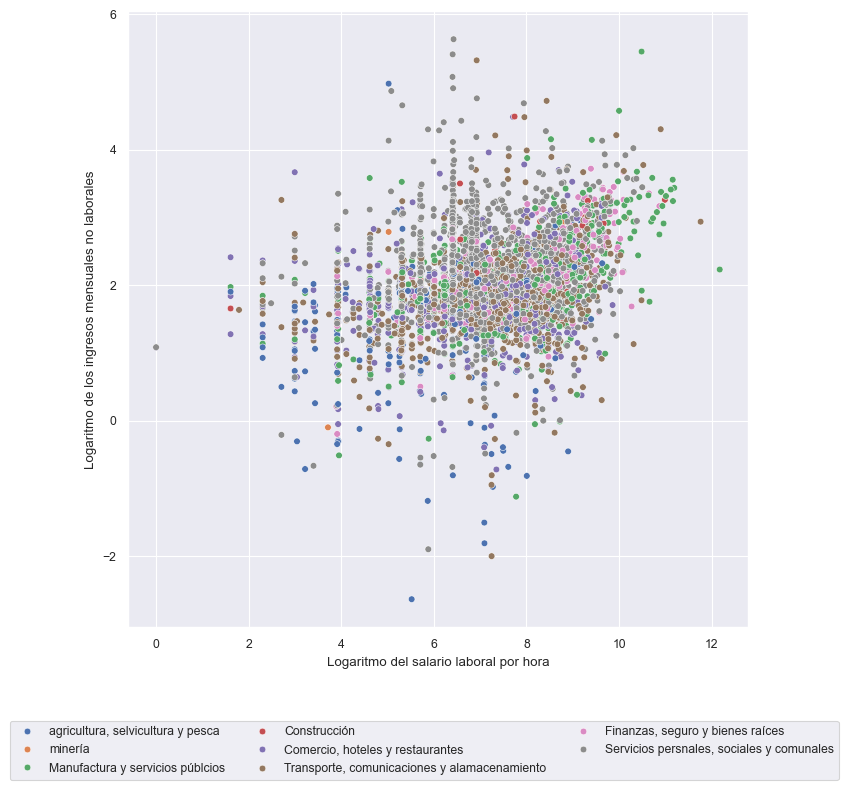

In [71]:
#Full sample

sns.set('paper')
plt.figure(figsize=(8, 8))
plot = sns.scatterplot(data=base4, x="l_n_labor", y="l_salario", hue="sector", palette="deep")

plt.xlabel('Logaritmo del salario laboral por hora')
plt.ylabel('Logaritmo de los ingresos mensuales no laborales')

# By default legend inside plot. Following codes allow us to put outside. 
# bbox_to_anchor: box location
# ncol: # columns of legend



plot.legend(loc='center left', bbox_to_anchor=(-0.2, -0.2), ncol=3)

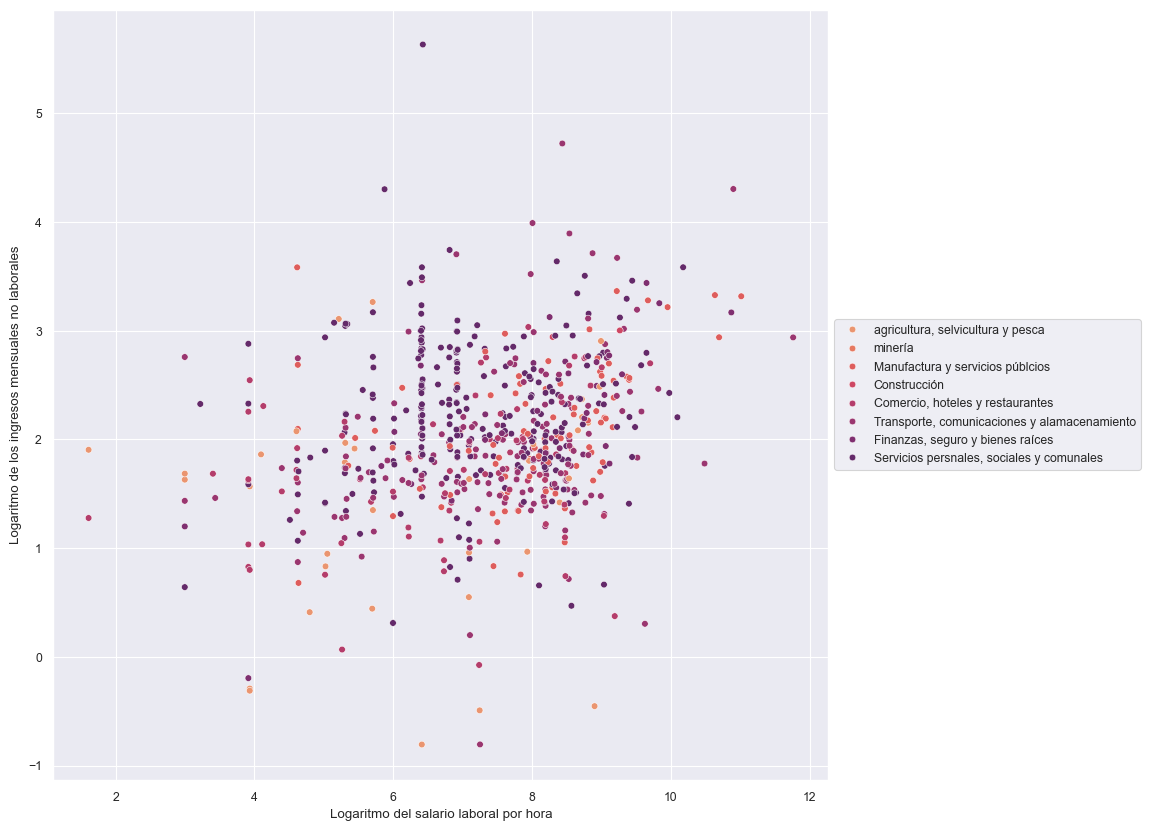

In [72]:
# Ramdon sample n = 3000

base5 = base4.sample(n = 3000)

sns.set('paper')
plt.figure(figsize=(10, 10))
plot = sns.scatterplot(data=base5, x="l_n_labor", y="l_salario", hue="sector", palette="flare")

plt.xlabel('Logaritmo del salario laboral por hora')
plt.ylabel('Logaritmo de los ingresos mensuales no laborales')

plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#### Reggresion real salary per hour and  non-labor income by strata

s = The marker size in points**2. <br>
linewidths = "The linewidth of the marker edges."

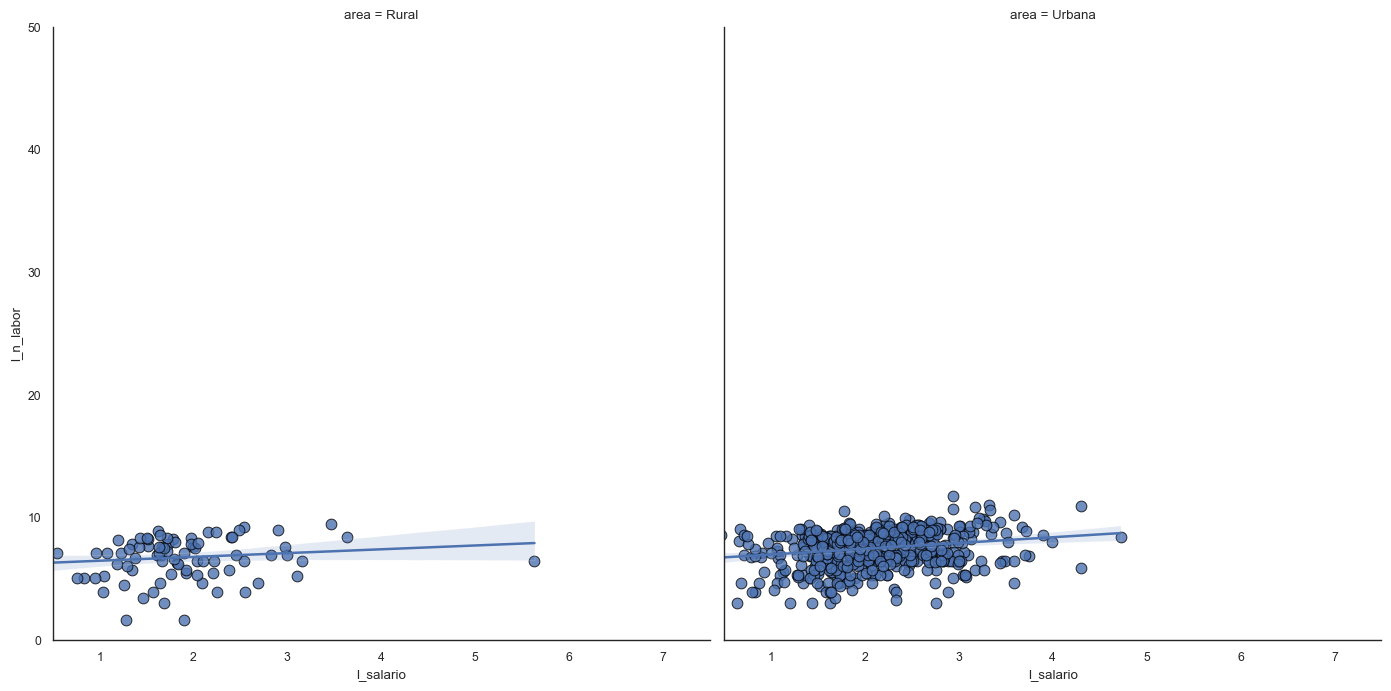

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
149053,2019,007215,059,11,130614,03,sierra norte,"401 a 4,000 viviendas",2.019007e+16,hijo/hija,...,11.0,6.0,17.0,Universitaria completa,4.0,16.0,0.0,729.0,familiar,130000
151899,2019,007956,049,11,150143,04,lima metropolitana,"mayor de 100,000 viviendas",2.016008e+16,yerno/nuera,...,11.0,3.0,14.0,No universitaria completa,6.0,36.0,NaN,676.0,familiar,150000
159056,2019,009346,086,11,230101,05,costa sur,"de 20,001 a 100,000 viviendas",2.019009e+16,hijo/hija,...,11.0,3.0,14.0,No universitaria completa,15.0,225.0,1.0,1225.0,familiar,230000
145771,2019,005861,037,11,060101,01,sierra norte,"de 20,001 a 100,000 viviendas",2.019006e+16,jefe/jefa,...,11.0,4.0,15.0,Universitaria incompleta,2.0,4.0,0.0,529.0,jefe,060000
152740,2019,007756,082,11,150121,03,lima metropolitana,"mayor de 100,000 viviendas",2.019008e+16,hijo/hija,...,11.0,5.0,16.0,Universitaria completa,4.0,16.0,0.0,676.0,familiar,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150267,2019,007478,019,11,140119,02,costa norte,Área de empadronamiento rural - aer compuesto,2.019007e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,6.0,36.0,NaN,529.0,familiar,140000
150814,2019,010222,111,11,150132,02,lima metropolitana,"mayor de 100,000 viviendas",2.017010e+16,hijo/hija,...,11.0,3.0,14.0,No universitaria completa,12.0,144.0,9.0,1024.0,familiar,150000
151127,2019,010213,076,11,150135,03,lima metropolitana,"mayor de 100,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,1.0,1.0,NaN,324.0,familiar,150000
160132,2019,009577,038,11,240304,05,costa norte,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,11.0,3.0,14.0,No universitaria completa,6.0,36.0,16.0,676.0,familiar,240000


In [73]:
sns.set_style("white")
gridobj = sns.lmplot(x="l_salario", y="l_n_labor", 
                     data=base5, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="area",
                     scatter_kws=dict(s=60, linewidths=0.7, edgecolors='black'))

gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()
base5


<Axes: xlabel='l_salario', ylabel='l_n_labor'>

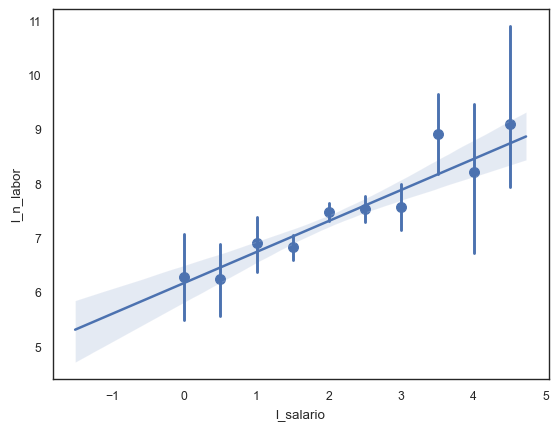

In [65]:
sns.regplot(data=base5, x="l_salario", y="l_n_labor", x_bins=np.arange(0, 7, 0.5), order=1)

## Macroeconomics 
IMP: log-Commodity price index, TC: log-exchange rate, RIN: log-international reserves, IPC: log-price consumption index, RATE: central bank rate reference

D: Annual difference

In [30]:
macro = pd.read_csv(r"../_data/macroeconomia.csv")
macro['YEAR']  = pd.to_datetime(macro['Fecha'])
macro

,Fecha,IPM,TC,RIN,IPC,RATE,DIPM,DTC,DRIN,DIPC,YEAR
0,2003-1,2.83506,1.25634,9.18519,4.41828,3.7500,13.73166,0.83108,12.50532,2.25690,2003-01-01
1,2003-2,2.85371,1.25004,9.21777,4.42295,3.8000,12.48664,0.16400,13.17984,2.76396,2003-02-01
2,2003-3,2.84717,1.24993,9.24303,4.43407,3.8200,7.76170,0.65330,17.18115,3.33857,2003-03-01
3,2003-4,2.80982,1.24554,9.24188,4.43356,3.8400,1.97256,0.69980,13.92729,2.56103,2003-04-01
4,2003-5,2.88617,1.24686,9.23065,4.43324,3.7800,6.81493,0.92160,12.37214,2.39028,2003-05-01
...,...,...,...,...,...,...,...,...,...,...,...
199,2019-8,3.74485,1.22252,11.12236,4.88368,2.5642,3.71183,2.73013,12.37958,2.01920,2019-08-01
200,2019-9,3.74443,1.20844,11.12124,4.88375,2.5038,7.63091,1.29986,15.82517,1.83408,2019-09-01
201,2019-10,3.70510,1.20622,11.13029,4.88486,2.5045,0.48716,0.71850,15.12033,1.86310,2019-10-01
202,2019-11,3.69955,1.20500,11.11988,4.88594,2.2984,0.97267,-0.08858,11.80591,1.84959,2019-11-01


Text(0.5, 0.01, 'Elboración propia - BCRP')

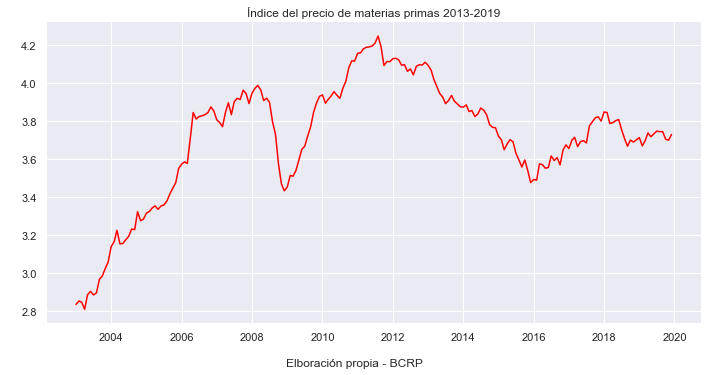

In [32]:
sns.set('notebook')

sns.relplot(x="YEAR", y="IPM", kind="line", color="red", data=macro, height=5, aspect=2)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Índice del precio de materias primas 2013-2019')

txt="Elboración propia - BCRP"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

#### Series in a single image

This graph shows a positive relationship between the change in international reserves and the commodity index.

Text(0.2, 0.01, 'Elaboración propia - BCRP')

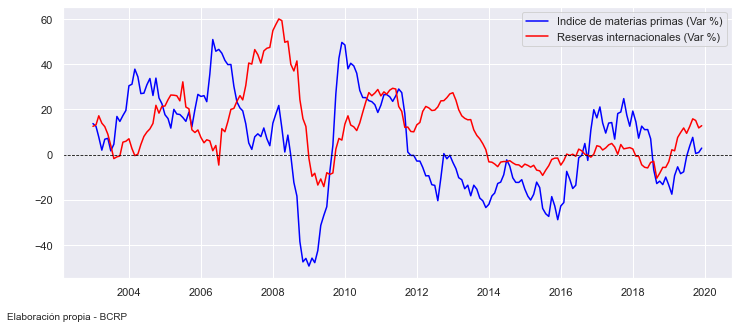

In [88]:
sns.set('notebook')


fig, ax = plt.subplots(figsize=(12,5))

x = macro['YEAR']
y1 = macro['DIPM']
y2 = macro['DRIN']

plt.plot(x, y1, label ='Indice de materias primas (Var %)', color='blue')
plt.plot(x, y2, label ='Reservas internacionales (Var %)', color='red')
plt.axhline(y=0, color='black', linestyle='--', lw=0.8)

plt.legend(loc='upper right')

txt="Elaboración propia - BCRP"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

### Dual-line Plots

#### Exchange rate and monetary policy reaction

Text(0.2, 0.01, 'Elboración propia - BCRP')

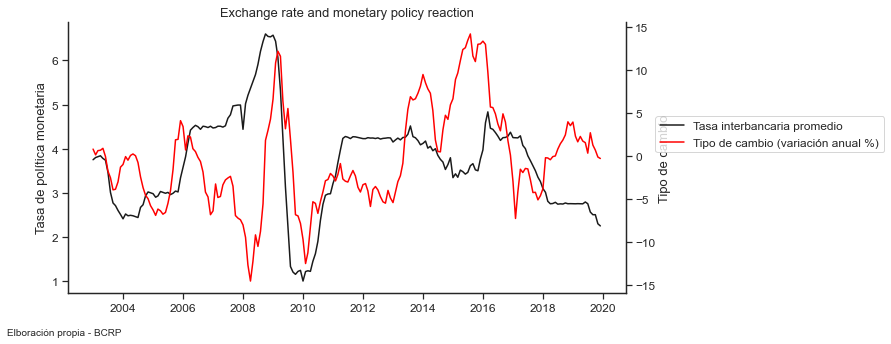

In [89]:
sns.set('notebook', style = "ticks", font_scale= 1.08)

fig, ax = plt.subplots(figsize=(10,5))
lineplot = sns.lineplot(x= "YEAR" , y= "RATE", data=macro, 
                        label = 'Tasa interbancaria promedio ', color="k", legend=False)

#sns.despine()
plt.ylabel('Tasa de política monetaria')
plt.xlabel(' ')
plt.title('Exchange rate and monetary policy reaction');

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x= "YEAR", y= "DTC", data=macro, ax=ax2, color = "red", 
                         label ='Tipo de cambio (variación anual %)', legend=False) 
sns.despine(right=False)
plt.ylabel('Tipo de cambio')
ax.figure.legend(loc='lower center', bbox_to_anchor=(1.1, 0.5), ncol=1);


txt="Elboración propia - BCRP"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

#### Reference:

#### Library of plots 

https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

#### Seaborn package:

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://programmerclick.com/article/54791895404/